# Suicide Analysis
Suicide has always been an overlooked subject in society but as suicide rates increase in teenagers we should be more and more concerned with what could be causing this increase. In this analysis I will do some historical research on suicide rates and statistics. 

## Downloading the Dataset

We download this data set using the kaggle api, and then access it in the directory

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [83]:
dataset_url = 'https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016' 

In [85]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aryannaik
Your Kaggle Key: ········


100%|██████████| 397k/397k [00:00<00:00, 102MB/s]

The dataset has been downloaded and extracted.

In [86]:
# Change this
data_dir = './suicide-rates-overview-1985-to-2016'

In [87]:
import os
os.listdir(data_dir)

['master.csv']

Let us save and upload our work to Jovian before continuing.

In [88]:
project_name = "Suicide Analysis" 

In [89]:
!pip install jovian --upgrade -q

In [90]:
import jovian

In [91]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aryannaik123/suicide-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aryannaik123/suicide-analysis


'https://jovian.ml/aryannaik123/suicide-analysis'

## Data Preparation and Cleaning

#### Preparing datset
##### Loading and describing Dataset using pandas

In [10]:
import pandas as pd
import numpy as np 

In [11]:
df = pd.read_csv("suicide-rates-overview-1985-to-2016/master.csv")
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [13]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [14]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [15]:
df.sort_values('suicides/100k pop',ascending=False)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1258,Aruba,1995,male,75+ years,2,889,224.97,Aruba1995,NaN,"1,320,670,391",17949,G.I. Generation
22280,Seychelles,2006,male,75+ years,2,976,204.92,Seychelles2006,NaN,"1,016,418,229",12442,Silent
24332,Suriname,2012,male,75+ years,10,5346,187.06,Suriname2012,0.711,"4,980,000,000",10227,Silent
20542,Republic of Korea,2011,male,75+ years,1276,688365,185.37,Republic of Korea2011,NaN,"1,202,463,682,634",25157,Silent
20530,Republic of Korea,2010,male,75+ years,1152,631853,182.32,Republic of Korea2010,NaN,"1,094,499,338,703",22994,Silent
...,...,...,...,...,...,...,...,...,...,...,...,...
3076,Barbados,2004,male,25-34 years,0,20092,0.00,Barbados2004,NaN,"3,514,350,000",13786,Generation X
3077,Barbados,2004,male,5-14 years,0,19715,0.00,Barbados2004,NaN,"3,514,350,000",13786,Millenials
3078,Barbados,2004,male,55-74 years,0,18209,0.00,Barbados2004,NaN,"3,514,350,000",13786,Silent
3079,Barbados,2004,male,75+ years,0,5655,0.00,Barbados2004,NaN,"3,514,350,000",13786,Silent


In [16]:
import jovian

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aryannaik123/suicide-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aryannaik123/suicide-analysis


'https://jovian.ml/aryannaik123/suicide-analysis'

## Exploratory Analysis and Visualization

### Exploring the connections between categories of the data set



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Mean, median, and other statistics for each column

In [49]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# Suicides per 100k people 

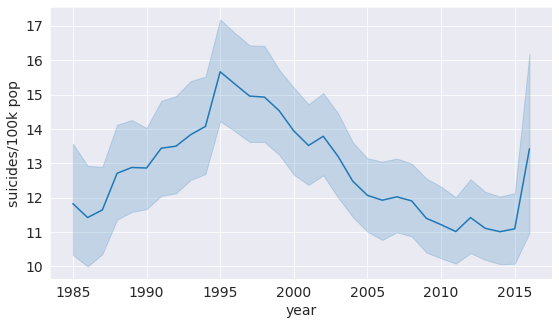

In [19]:
sns.lineplot(data=df,x="year",y="suicides/100k pop");

# Generational Comparison

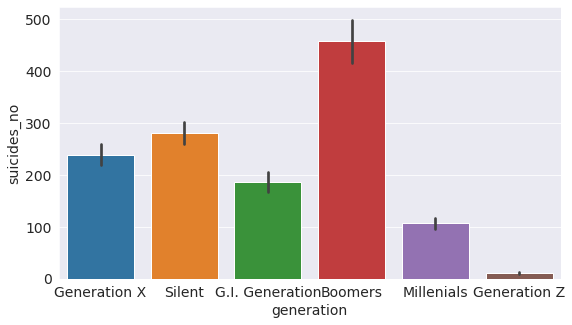

In [20]:
sns.barplot('generation', 'suicides_no', data=df);

# Yearly GDP in the US

In [21]:
us_df = df.loc[df.country == 'United States']

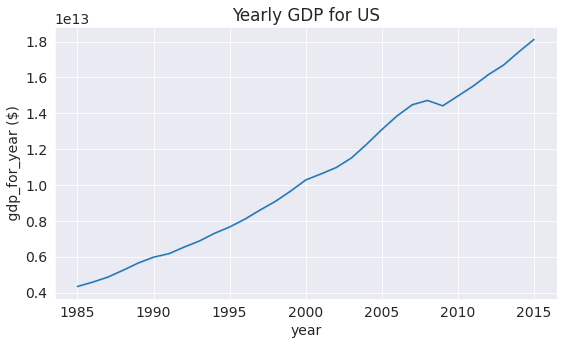

In [47]:
pd.set_option('mode.chained_assignment', None)
us_df[' gdp_for_year ($) '] = us_df[' gdp_for_year ($) '].replace(',','', regex=True).astype(int)
sns.lineplot(x="year",y=' gdp_for_year ($) ',data=us_df).set_title("Yearly GDP for US");

# Yearly Number of Suicides in the US

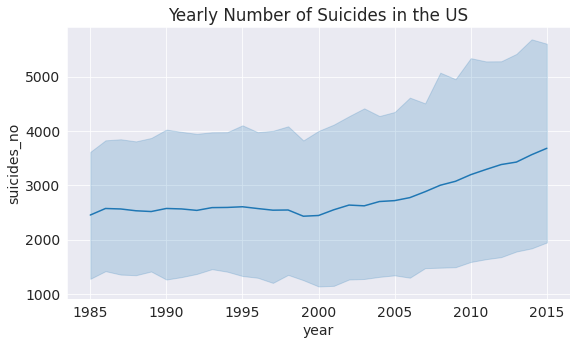

In [50]:
sns.lineplot(x="year",y='suicides_no',data=us_df).set_title("Yearly Number of Suicides in the US");

Let us save and upload our work to Jovian before continuing

In [51]:
import jovian

In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aryannaik123/suicide-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aryannaik123/suicide-analysis


'https://jovian.ml/aryannaik123/suicide-analysis'

## Asking and Answering Questions

### Questions about the Suicide Data Set

> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



###  Does GDP per capita effect number of suicides 

GDP per capita in the US particularly does not seem to affect the number of suicides however this could be due to inflation, or some lurking variable

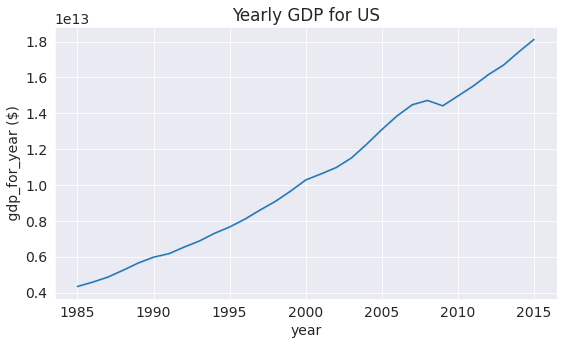

In [55]:
sns.lineplot(x="year",y=' gdp_for_year ($) ',data=us_df).set_title("Yearly GDP for US");

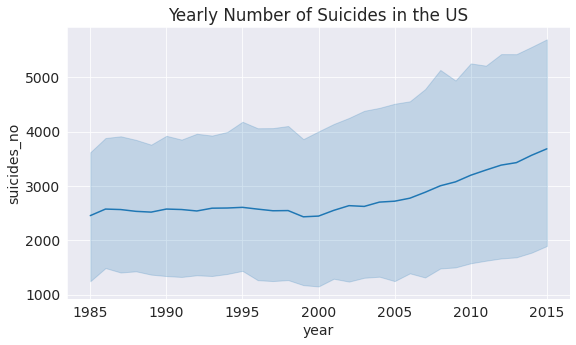

In [56]:
sns.lineplot(x="year",y='suicides_no',data=us_df).set_title("Yearly Number of Suicides in the US");

Using seaborn library to graph data

#### Rise in number of Suicides

There is a noticable rise in sucides particularly seen in this breakdown of number of suicides per generation. 

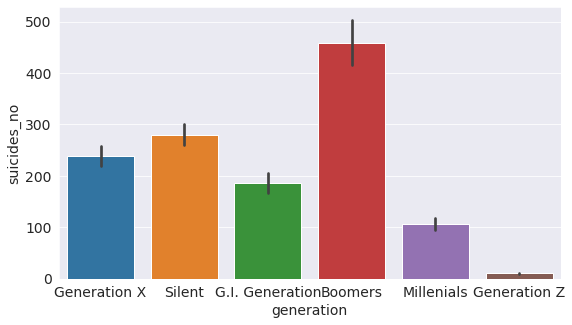

In [59]:
sns.barplot('generation', 'suicides_no', data=df);

again using seaborn to get an aggregation of generational data

#### Are Males more at risk of suicide?

Males are overwhelmingly more at risk. In every country and year males had a greater number of suicides. This could be due to a reporting bias but it seems like if any bias was the case it would've been made more obvious. 

In [67]:
df["sex"].describe()

count     27820
unique        2
top        male
freq      13910
Name: sex, dtype: object

In [70]:
df.loc[df.sex == "male"]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
27809,Uzbekistan,2014,male,25-34 years,318,2739150,11.61,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent


Using the pandas library we can see how many counts there is of male indicating males had more number of suicides in the particular country and year

#### Correlation of Age with likelihood of suicide 

It seems historically people of the ages 35-54 have historically been the most likely to commit suicide. 

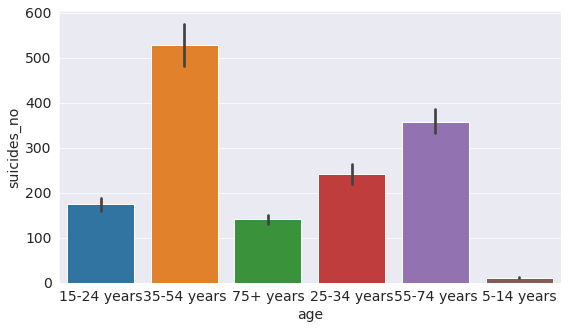

In [74]:
sns.barplot('age', 'suicides_no', data=df);

Using seaborn library we can create a bar plot with an aggregation of number of suicides for age groups

#### What is the greatest number of suicides in a country within one year

The greatest number of suicides was in the Russian Federation in the year 1994. 22338 people committed suicide. 

In [95]:
df.sort_values('suicides_no',ascending=False)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.30,Russian Federation1994,NaN,"395,077,301,248",2853,Boomers
21008,Russian Federation,1995,male,35-54 years,21706,19249600,112.76,Russian Federation1995,NaN,"395,531,066,563",2844,Boomers
21080,Russian Federation,2001,male,35-54 years,21262,21476420,99.00,Russian Federation2001,NaN,"306,602,673,980",2229,Boomers
21068,Russian Federation,2000,male,35-54 years,21063,21378098,98.53,Russian Federation2000,NaN,"259,708,496,267",1879,Boomers
21057,Russian Federation,1999,male,35-54 years,20705,21016400,98.52,Russian Federation1999,NaN,"195,905,767,669",1412,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
4063,Belize,2008,male,55-74 years,0,9580,0.00,Belize2008,NaN,"1,368,625,150",5098,Silent
10618,Grenada,2009,male,35-54 years,0,10585,0.00,Grenada2009,NaN,"771,278,111",8140,Boomers
10617,Grenada,2009,male,25-34 years,0,8697,0.00,Grenada2009,NaN,"771,278,111",8140,Generation X
10616,Grenada,2009,male,15-24 years,0,12076,0.00,Grenada2009,NaN,"771,278,111",8140,Millenials


The top 10 in this category are all in the Russian Federation

In [96]:
df.sort_values('suicides_no',ascending=False).head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.30,Russian Federation1994,NaN,"395,077,301,248",2853,Boomers
21008,Russian Federation,1995,male,35-54 years,21706,19249600,112.76,Russian Federation1995,NaN,"395,531,066,563",2844,Boomers
21080,Russian Federation,2001,male,35-54 years,21262,21476420,99.00,Russian Federation2001,NaN,"306,602,673,980",2229,Boomers
21068,Russian Federation,2000,male,35-54 years,21063,21378098,98.53,Russian Federation2000,NaN,"259,708,496,267",1879,Boomers
21057,Russian Federation,1999,male,35-54 years,20705,21016400,98.52,Russian Federation1999,NaN,"195,905,767,669",1412,Boomers
21020,Russian Federation,1996,male,35-54 years,20562,19507100,105.41,Russian Federation1996,NaN,"391,719,993,757",2813,Boomers
20984,Russian Federation,1993,male,35-54 years,20256,18908000,107.13,Russian Federation1993,NaN,"435,083,713,851",3160,Boomers
21092,Russian Federation,2002,male,35-54 years,20119,21320535,94.36,Russian Federation2002,NaN,"345,110,438,692",2527,Boomers
21033,Russian Federation,1997,male,35-54 years,18973,19913400,95.28,Russian Federation1997,NaN,"404,926,534,140",2907,Boomers
21105,Russian Federation,2003,male,35-54 years,18681,21007346,88.93,Russian Federation2003,NaN,"430,347,770,732",3141,Boomers


Using pandas we can use a dataframe to analyze the data using a table format, and sort by columns

In [101]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Inferences and Conclusion

Overall suicide rates have dramtically increased in the last several years possiby due to social media. We should be concerned with the effects of social media on youth. We can be more active in young people's lives to help them. Overall I learned a lot about suicide from this project and it's statistical history.

In [99]:
import jovian

In [100]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aryannaik123/suicide-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aryannaik123/suicide-analysis


'https://jovian.ml/aryannaik123/suicide-analysis'

## References and Future Work

This was a very interesting course, I am very happy with what I learned and I am excited to work on new projects. I am working on creating a Student Research Group called ResearchZ.

[ResearchZ](researchz.technology)

[Linkedin](linkedin.com/in/aryan-naik-b242041b3/) - My Linkedin 

[GitHub](https://github.com/aryanNaik123) - My Github

Below are some resources if you or someone you know is suffering with Depression or suicidal thoughts. This is a very personal subject so if you need someone to talk to you can contact me at aryannnaik@outlook.com

ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ ˇ 

Crisis services
24/7 Crisis Hotline: National Suicide Prevention Lifeline Network
www.suicidepreventionlifeline.org
1-800-273-TALK (8255) (Veterans, press 1)

Crisis Text Line
Text TALK to 741-741 to text with a trained crisis counselor from the Crisis Text Line for free, 24/7

Veterans Crisis Line
Send a text to 838255

Vets4Warriors

SAMHSA Treatment Referral Hotline (Substance Abuse)
1-800-662-HELP (4357)

RAINN National Sexual Assault Hotline
1-800-656-HOPE (4673)

National Teen Dating Abuse Helpline
1-866-331-9474

The Trevor Project
1-866-488-7386

Also visit your:

Primary care provider
Local psychiatric hospital
Local walk-in clinic
Local emergency department
Local urgent care center
Finding mental health care
American Psychiatric Association

American Psychological Association

National Association of Social Workers

SAMHSA Mental Health Provider Locator

Veterans Affairs

Additional resources by mental health condition
Alcohol & drugs
Substance Abuse and Mental Health Services Administration

National Institute on Drug Abuse

Narcotics Anonymous

Alcoholics Anonymous

Physicians for Responsible Opioid Prescribing (PROP)

National Institute on Alcohol Abuse and Alcoholism

Start Your Recovery

Detox Local's Drug Withdrawal and Detox Guide

Anxiety disorders
National Education Alliance for Borderline Personality

Teen’s Health

Anxiety Disorders Association of America

Bipolar disorder
Depression and Bipolar Support Alliance

National Education Alliance for Borderline Personality

Teen’s Health

Borderline personality
BPDVideo

National Education Alliance for Borderline Personality

Cutting
Teen’s Health

Self Abuse Finally Ends

Depression
Depression and Bipolar Support Alliance

National Education Alliance for Borderline Personality

Families for Depression Awareness

Teen’s Health

American Psychiatric Foundation

National Alliance on Mental Illness

HeadsUpGuys

Eating disorders
Teen’s Health

Overeaters Anonymous

National Association of Anorexia Nervosa and Associated Disorders

National Eating Disorders Association

Eating Disorders Anonymous

Proud2Bme

Understanding Eating Disorders

Emotional health
Let’s Erase The Stigma

Love is Louder

Half of Us

Veterans United

American Psychiatric Foundation

Active Minds

OK2TALK

Make The Connection

Inspire USA Foundation

National Dialogue on Mental Health

Each Mind Matters

Befrienders Worldwide

Veterans Affairs Training

Veterans Affairs Mental Health Toolkit

Veterans Affairs Mental Health

Schizophrenia
Schizophrenics Anonymous

Schizophrenia.com

National Alliance on Mental Illness

Stress
Veterans United

Stress Management-HelpGuide.org

Teen’s Health

Suicide prevention
American Association of Suicidology

Crisis Text Line

The Dougy Center – The National Center for Grieving Children and Families

How to Talk to a Child about a Suicide Attempt in Your Family (Rocky Mountain MIRECC)

The Jason Foundation

The Jed Foundation

Lifeline Chat

Man Therapy

Mental Health America

My3 App

National Action Alliance for Suicide Prevention

National Organization for People of Color Against Suicide

National Suicide Prevention Lifeline

Now Matters Now

Parents, Families, Friends, and Allies United with LGBTQ People (PFLAG)

Safety Planning Tools

SAVE

The Society for the Prevention of Teen Suicide

StopBullying.gov

Suicide Prevention Resource Center

Teen’s Health

The Trevor Project

The Tyler Clementi Foundation

Veterans Crisis Line

Wounded Warrior Project

In [2]:
import jovian

In [ ]:
jovian.commit(git_commit=True)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


**A Research Project on Suicide**

**by Aryan Naik**